In [2]:
#%matplotlib notebook
import pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from itertools import count


HE = -20/57.3 # heading error in radians
N = 3 #proportional navigation gain 
samples = 20001
t = np.linspace(0, 20, samples) 
v_p0 = 3000   #ft/s
V_T= 1000    #ft/s
R_0 = 40000  #ft
dt = 0.001      #sec

v_pz_intertial_0= v_p0*np.sin(HE)

v_px_intertial_0= v_p0*np.cos(HE)

print(t.size)

R_px = np.zeros(t.size)
R_pz = np.zeros(t.size)

R_px_true = np.zeros(t.size)
R_pz_true = np.zeros(t.size)

R_tx = np.zeros(t.size)
L = np.zeros(t.size)
R_tz = np.zeros(t.size)

R_tpx= np.zeros(t.size)
R_tpz= np.zeros(t.size)

R_tpx_true= np.zeros(t.size)
R_tpz_true= np.zeros(t.size)

lamda = np.zeros(t.size)

a_p_pure = np.zeros(t.size)

a_i_pure_x =np.zeros(t.size) 
a_i_pure_z = np.zeros(t.size)

a_p_true = np.zeros(t.size)

a_p_true_z = np.zeros(t.size)
a_p_true_x = np.zeros(t.size)

a_i_true_x =np.zeros(t.size) 
a_i_true_z = np.zeros(t.size)
range_pt  = np.zeros(t.size)

V_px = np.zeros(t.size)
V_pz =np.zeros(t.size)
v_c = np.zeros(t.size)
V_px_true = np.zeros(t.size)
V_pz_true =np.zeros(t.size)
lamda_true = np.zeros(t.size)
V_tx = -V_T*np.ones(t.size)

V_tz = np.zeros(t.size)


miss_distance_x = 0
miss_distance_z =0
print(R_px)

V_px[0]= v_px_intertial_0
V_pz[0]= v_pz_intertial_0

V_px_true[0] =V_px[0] 
V_pz_true[0] =V_pz[0]
i=0

R_tx[0] = R_0

R_tpx[0] = R_0
R_tpx_true[0] = R_0
range_pt [0]= R_0


flag1= True
flag2= True


 
while (flag1 and flag2):
    R_px[i+1]= V_px[i]*dt + R_px[i]
    R_pz[i+1]= V_pz[i]*dt + R_pz[i]

    R_tx[i+1]= V_tx[i]*dt + R_tx[i]
    
    R_tpx[i+1] = R_px[i+1] - R_tx[i+1]
    R_tpz[i+1] = R_pz[i+1] - R_tz[i+1]
    
    
    
    
    R_px_true[i+1]= V_px_true[i]*dt + R_px_true[i]
    R_pz_true[i+1]= V_pz_true[i]*dt + R_pz_true[i]
    
   

    R_tpx_true[i+1] = R_px_true[i+1] - R_tx[i+1]
    R_tpz_true[i+1] = R_pz_true[i+1] - R_tz[i+1]
    
    #true pronav
    range_pt[i+1] = np.sqrt(np.power(R_tpx[i+1],2) + np.power(R_tpz[i+1],2))
    v_c[i+1] = -(range_pt[i+1] - range_pt[i])/dt # going to use it for a_p_true calculation

    lamda_true[i+1] =np.arctan(R_tpz_true[i+1]/R_tpx_true[i+1])
    lamda_dot_true = (lamda_true[i+1]-lamda_true[i])/dt
    a_p_true [i+1]= N*v_c[i+1]*lamda_dot_true
    
    a_p_true_z [i+1] = a_p_true[i+1]*np.cos(lamda_true[i+1])
    a_p_true_x [i+1] = a_p_true[i+1]*np.sin(lamda_true[i+1])
    
    V_px_true[i+1] = a_p_true_x[i+1]*dt + V_px_true[i]
    V_pz_true[i+1] = a_p_true_z[i+1]*dt + V_pz_true[i]

     # Pure ProNav   
    lamda[i+1] = np.arctan(R_tpz[i+1]/R_tpx[i+1])
    L[i+1]  =  np.arcsin((V_T/v_p0*np.sin(lamda[i+1])))
    lamda_dot = (lamda[i+1]-lamda[i])/dt 
    a_p_pure[i+1] = N*np.sqrt(np.power(V_px[i],2) + np.power(V_pz[i],2))*lamda_dot              # simulating for Pure pronav law
 
    a_i_pure_x[i+1]= a_p_pure[i+1]*np.sin(lamda[i+1]+L[i+1] )
    a_i_pure_z[i+1]= a_p_pure[i+1]*np.cos(lamda[i+1]+L[i+1]) 
    
    # V_px[i+1] = v_p0*np.cos(L[i+1] + HE + lamda[i+1])
    # V_pz[i+1] = v_p0*np.sin(L[i+1] + HE + lamda[i+1])
    
    V_px[i+1] = a_i_pure_x[i+1]*dt + V_px[i]
    V_pz[i+1] = a_i_pure_z[i+1]*dt + V_pz[i]

   
    
    if ((R_px[i] > 0.99995*R_tx[i]) and (R_px[i] < 1.00005*R_tx[i])): # crudely tracing the hit 
        flag1 = False
        miss_distance_x = np.abs(R_tx[i]) - np.abs(R_px[i])
    
    elif(i >= samples):
        flag1= False
    else:

        flag1 = True

    if ((R_pz[i] > 0.99995*R_tz[i]) and (R_pz[i] < 1.00005*R_tz[i])):
        
        miss_distance_z = np.abs(R_tz[i]) - np.abs(R_pz[i])
        flag2 = False
    elif(i >= samples):
        flag1= False    
    else:
     
        flag2 = True

    i += 1
    
    

20001
[0. 0. 0. ... 0. 0. 0.]


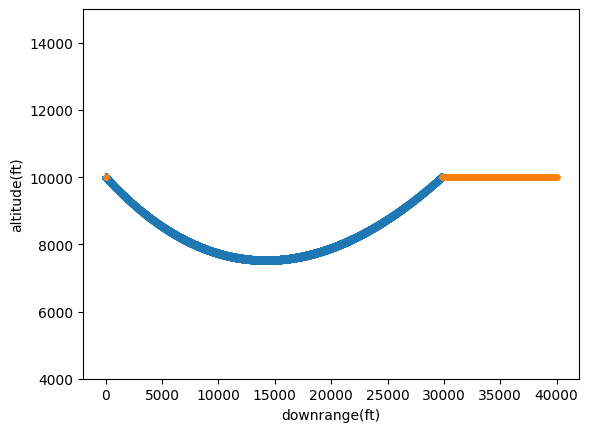

In [3]:
# unsuccessful attempt of making a live graph 
#x1_vals = []
#y1_vals = []
#x2_vals = []
#y2_vals = []
#i= count()
#def animate(i):
#    x1_vals.append(R_px[i])
#    y1_vals.append(R_pz[i])
#    x2_vals.append(R_tx[i])
#    y2_vals.append(R_tz[i])
    
#    plt.plot(x1_vals,y1_vals,'*')
#    plt.plot(x2_vals,y2_vals,'.')


#ani = FuncAnimation(plt.gcf(), animate, interval=1000)
#plt.tight_layout()
plt.xlabel('downrange(ft)')
plt.ylabel('altitude(ft)')
R_pz1 = R_pz +10000
R_tz1 = R_tz +10000
plt.ylim([4000,15000])
plt.plot(R_px,R_pz1,'+')
plt.plot(R_tx,R_tz1,'.')
plt.show() 


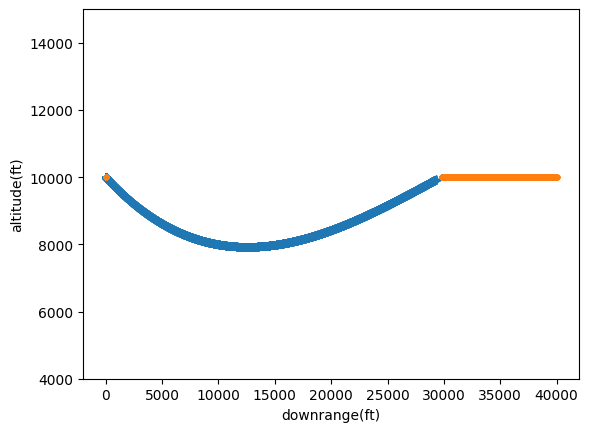

In [4]:
plt.xlabel('downrange(ft)')
plt.ylabel('altitude(ft)')
R_pz1_true = R_pz_true +10000
R_tz1 = R_tz +10000
plt.ylim([4000,15000])
plt.plot(R_px_true,R_pz1_true,'+')
plt.plot(R_tx,R_tz1,'.')
plt.show() 

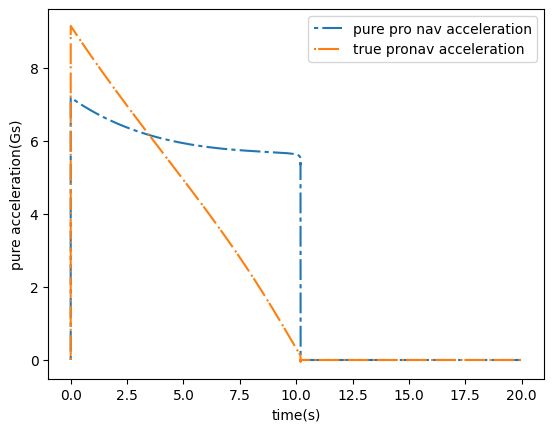

In [5]:
plt.xlabel('time(s)')
plt.ylabel('pure acceleration(Gs)')  # pure acceleration decreasing with time validates the existance of engagement triangle. Also, the fact the lOS angle doesnt change before last few instances 
g = 32.12 #ft/s^2
line1, = plt.plot(t,a_p_pure/g,label='pure pro nav acceleration')
line2,= plt.plot(t,a_p_true/g,label='true pronav acceleration')
line1.set_dashes([2, 2, 10, 2])
line2.set_dashes([1, 1, 10, 2])
plt.legend()
plt.show()

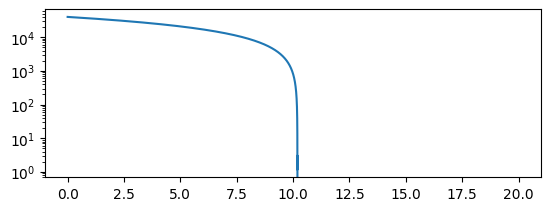

In [6]:
#plt.plot(t,range_pt,'.')
#plt.show()

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(t,range_pt)
ax.set_yscale('log')
pylab.show()


In [8]:
print(miss_distance_x)
print(miss_distance_z)

1.142032819774613
0
